# Data Cleaning

The purpose of this workbook is to clean the hotel booking data by eliminating unnessessary columns and information.  

The workbook will be the first step in preparing the data for machine learning.

The hotel bookings data set contains a single file which compares various booking information between two hotels: a city hotel and a resort hotel

In [29]:
# Import libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from collections import Counter
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [30]:
# Set the random seed for reproducibility
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [31]:
# Load the hotel booking data into the workbook and convert to pandas Dataframe
csv_path = Path('../Resources/hotel_bookings.csv')

df = pd.read_csv(csv_path)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [32]:
# Convert the 'arival date month' to a numberical value for data cleaning
import calendar

name_to_num = {name: num for num, name in enumerate(calendar.month_name) if num}

df["arrival_date_month"] = df["arrival_date_month"].apply(lambda x: name_to_num[x])
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [33]:
# Combine the 'arival date month', 'arival date day', and 'arival date year' into a new comlum with a full date
date = df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']]
date_df = date['arrival_date_year'].map(str) + '-' + date['arrival_date_month'].map(str) + '-' + date['arrival_date_day_of_month'].map(str)
date = pd.to_datetime(date_df)

df['date'] = date
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [34]:
# Examine the shape of the dataframe
df.shape

(119390, 33)

In [35]:
# Dropping various columns not needed for the analysis
drop_columns = [
    'is_repeated_guest', # reflecte 3,810 of total 119K rows (redundant data)
    # 'country', # too many unique values in the dataset (178 total)
    # 'arrival_date_day_of_month', # consolidated into arrival date column
    # 'arrival_date_year', # consolidated into arrival date column
    # 'arrival_date_month', # consolidated into arrival date column
    'deposit_type', # 88% of data points show no deposit (redudant data)
    'is_canceled', # has no bearing on the final booking rate
    'booking_changes', # 
    'days_in_waiting_list', # not considered meaningful
    'agent', # random value of travel agent who booked the stay (not meaningful)
    'company', # random value of company who booked made the booking.  Not meaninful
    'reservation_status', # data leakage as we are only concerned with booking rate
    'reservation_status_date', # data leakage, not concerned when the customer canceled or checked out
    #'customer_type', # 4 unique values
    #'market_segment', # cleaned later in the workbook
    'distribution_channel', # this has 8 unique values which requires more pre-processing to turn into feature
    'previous_cancellations', # only 6,051 previous cancelations
    'previous_bookings_not_canceled', # only reflects 580 values not meaningful
    'assigned_room_type', # this is data leakage.  We only care about the booking room
    # 'total_of_special_requests', # 48,692 instances of special requests
    # 'adults', # hotels typically charge for double occupancy this is pertenant
    'children', # most hotels don't charge for children (rates based on double occupancy) 8,513 instances
    'babies', # most hotels do not charge a premium for babies, 900 total instances of this in data set
    'required_car_parking_spaces' # only 7,803 total requests
]
df = df.drop(drop_columns, axis=1)
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,reserved_room_type,customer_type,adr,total_of_special_requests,date
0,Resort Hotel,342,2015,7,27,1,0,0,2,BB,PRT,Direct,C,Transient,0.0,0,2015-07-01
1,Resort Hotel,737,2015,7,27,1,0,0,2,BB,PRT,Direct,C,Transient,0.0,0,2015-07-01
2,Resort Hotel,7,2015,7,27,1,0,1,1,BB,GBR,Direct,A,Transient,75.0,0,2015-07-01
3,Resort Hotel,13,2015,7,27,1,0,1,1,BB,GBR,Corporate,A,Transient,75.0,0,2015-07-01
4,Resort Hotel,14,2015,7,27,1,0,2,2,BB,GBR,Online TA,A,Transient,98.0,1,2015-07-01


In [36]:
# Eliminate rows that by market segment which may be reflected at a reduced cost or $0 booking fee and drop undefined meal plan data

def market_segment(df):
    df.drop(df[df['market_segment']=='Undefined'].index, inplace = True)
    df.drop(df[df['market_segment']=='Aviation'].index, inplace = True)
    df.drop(df[df['market_segment']=='Complementary'].index, inplace = True)
    df.drop(df[df['market_segment']=='Corporate'].index, inplace = True)
    df.drop(df[df['meal']=='Undefined'].index, inplace = True)
    return df

In [37]:
df = market_segment(df)
df.head(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,reserved_room_type,customer_type,adr,total_of_special_requests,date
0,Resort Hotel,342,2015,7,27,1,0,0,2,BB,PRT,Direct,C,Transient,0.0,0,2015-07-01
1,Resort Hotel,737,2015,7,27,1,0,0,2,BB,PRT,Direct,C,Transient,0.0,0,2015-07-01
2,Resort Hotel,7,2015,7,27,1,0,1,1,BB,GBR,Direct,A,Transient,75.0,0,2015-07-01
4,Resort Hotel,14,2015,7,27,1,0,2,2,BB,GBR,Online TA,A,Transient,98.0,1,2015-07-01
5,Resort Hotel,14,2015,7,27,1,0,2,2,BB,GBR,Online TA,A,Transient,98.0,1,2015-07-01


In [38]:
df.market_segment.value_counts()

Online TA        56461
Offline TA/TO    23961
Groups           19010
Direct           12533
Name: market_segment, dtype: int64

In [39]:
# Drop all rows which contain an ADR (average daily rate) less than or equal to $50 to obtain realistic rates
index_names = df[df['adr']<=50.0].index
df.drop(index_names, inplace=True)
df.head()


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,reserved_room_type,customer_type,adr,total_of_special_requests,date
2,Resort Hotel,7,2015,7,27,1,0,1,1,BB,GBR,Direct,A,Transient,75.0,0,2015-07-01
4,Resort Hotel,14,2015,7,27,1,0,2,2,BB,GBR,Online TA,A,Transient,98.0,1,2015-07-01
5,Resort Hotel,14,2015,7,27,1,0,2,2,BB,GBR,Online TA,A,Transient,98.0,1,2015-07-01
6,Resort Hotel,0,2015,7,27,1,0,2,2,BB,PRT,Direct,C,Transient,107.0,0,2015-07-01
7,Resort Hotel,9,2015,7,27,1,0,2,2,FB,PRT,Direct,C,Transient,103.0,1,2015-07-01


In [40]:
# df = df.round({'adr': -1})

In [41]:
# df.adr.value_counts()

In [42]:
# Confirm all adr less than 20 eliminated and confirm max value

print(df.adr.min())
print(df.adr.max())

50.02
5400.0


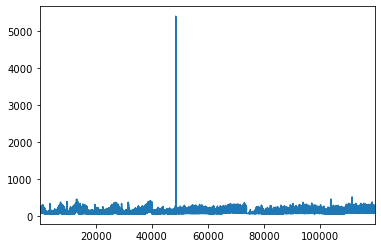

In [43]:
# confirm value range of adr
df.adr.plot()

In [44]:
# Examine largest values in the adr column
df.nlargest(10,'adr')


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,reserved_room_type,customer_type,adr,total_of_special_requests,date
48515,City Hotel,35,2016,3,13,25,0,1,2,BB,PRT,Offline TA/TO,A,Transient,5400.00,0,2016-03-25
111403,City Hotel,0,2017,5,19,9,0,1,1,BB,ITA,Offline TA/TO,A,Transient,510.00,0,2017-05-09
103912,City Hotel,81,2016,12,53,31,1,1,2,BB,PRT,Direct,E,Transient-Party,451.50,4,2016-12-31
13142,Resort Hotel,378,2017,8,31,1,4,10,2,BB,PRT,Online TA,A,Transient,450.00,0,2017-08-01
13391,Resort Hotel,59,2017,8,33,13,2,4,2,FB,PRT,Direct,H,Transient,437.00,0,2017-08-13
39568,Resort Hotel,104,2017,8,33,17,2,3,3,HB,ESP,Online TA,H,Transient,402.00,1,2017-08-17
39118,Resort Hotel,26,2017,7,31,31,3,5,3,HB,MAR,Direct,H,Transient,397.38,1,2017-07-31
13323,Resort Hotel,116,2017,8,32,9,2,8,2,HB,PRT,Direct,F,Transient,392.00,0,2017-08-09
39517,Resort Hotel,24,2017,8,33,17,0,3,2,HB,PRT,Online TA,G,Transient,392.00,1,2017-08-17
13406,Resort Hotel,53,2017,8,33,14,1,2,3,HB,ESP,Online TA,H,Transient,388.00,0,2017-08-14


In [45]:
# drop the outlying adr rate from dataframe

index_names = df[df['adr']>550].index
df.drop(index_names, inplace=True)
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,reserved_room_type,customer_type,adr,total_of_special_requests,date
2,Resort Hotel,7,2015,7,27,1,0,1,1,BB,GBR,Direct,A,Transient,75.0,0,2015-07-01
4,Resort Hotel,14,2015,7,27,1,0,2,2,BB,GBR,Online TA,A,Transient,98.0,1,2015-07-01
5,Resort Hotel,14,2015,7,27,1,0,2,2,BB,GBR,Online TA,A,Transient,98.0,1,2015-07-01
6,Resort Hotel,0,2015,7,27,1,0,2,2,BB,PRT,Direct,C,Transient,107.0,0,2015-07-01
7,Resort Hotel,9,2015,7,27,1,0,2,2,FB,PRT,Direct,C,Transient,103.0,1,2015-07-01


In [46]:
# Confirm all adr max value eliminated and confirm max value

print(df.adr.min())
print(df.adr.max())

50.02
510.0


In [47]:
# Drop columns with only one value
df = df.loc[:,df.apply(pd.Series.nunique) != 1]


In [48]:
# Examine columns with unique values

for col in df.columns:
    if (len(df[col].unique()) < 8):
        print(df[col].value_counts())
        print()

City Hotel      74258
Resort Hotel    28266
Name: hotel, dtype: int64

2016    48407
2017    36080
2015    18037
Name: arrival_date_year, dtype: int64

2    81162
1    15053
3     6045
0      205
4       59
Name: adults, dtype: int64

BB    77762
HB    13695
SC    10340
FB      727
Name: meal, dtype: int64

Online TA        53255
Offline TA/TO    21098
Groups           17105
Direct           11066
Name: market_segment, dtype: int64

Transient          78012
Transient-Party    20381
Contract            3722
Group                409
Name: customer_type, dtype: int64

0    58412
1    29682
2    11800
3     2294
4      297
5       39
Name: total_of_special_requests, dtype: int64



In [49]:
# Drop null values

df = df.dropna()

df.shape

(102361, 17)

In [50]:
# Show final dataframe

df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,reserved_room_type,customer_type,adr,total_of_special_requests,date
2,Resort Hotel,7,2015,7,27,1,0,1,1,BB,GBR,Direct,A,Transient,75.0,0,2015-07-01
4,Resort Hotel,14,2015,7,27,1,0,2,2,BB,GBR,Online TA,A,Transient,98.0,1,2015-07-01
5,Resort Hotel,14,2015,7,27,1,0,2,2,BB,GBR,Online TA,A,Transient,98.0,1,2015-07-01
6,Resort Hotel,0,2015,7,27,1,0,2,2,BB,PRT,Direct,C,Transient,107.0,0,2015-07-01
7,Resort Hotel,9,2015,7,27,1,0,2,2,FB,PRT,Direct,C,Transient,103.0,1,2015-07-01


In [51]:
# Write the cleaned data to a new csv file

df.to_csv('../Resources/cleaned_hotel_bookings.csv')